In [1]:
# load data from geojson and geospatial packages

import geopandas as gpd


In [2]:
import geopandas as gpd

# Load data from the exported Overpass GeoJSON
gdf = gpd.read_file("overpass_data/export.geojson")

# Inspect the data
print(gdf.head())
print(gdf.crs)
print(gdf.shape)

             id           @id HE_ref addr:city addr:country addr:county  \
0   way/4015968   way/4015968   None      None         None        None   
1   way/4015969   way/4015969   None      None         None        None   
2   way/5132967   way/5132967   None      None         None        None   
3  way/27297477  way/27297477   None      None         None        None   
4  way/27297479  way/27297479   None      None         None        None   

  addr:hamlet addr:housename addr:parentstreet addr:postcode  ... start_date  \
0        None           None              None          None  ...       None   
1        None           None              None          None  ...       None   
2        None           None              None          None  ...       None   
3        None           None              None          None  ...       None   
4        None           None              None          None  ...       None   

  start_date:railway tracks train tunnel usage wheelchair wikidata w

/var/folders/91/b5rp226n7ngfb253bz0zjxp00000gn/T/ipykernel_86040/3211765955.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffer = wsr_line.buffer(0.001).unary_union
/var/folders/91/b5rp226n7ngfb253bz0zjxp00000gn/T/ipykernel_86040/3211765955.py:15: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  buffer = wsr_line.buffer(0.001).unary_union


<Axes: >

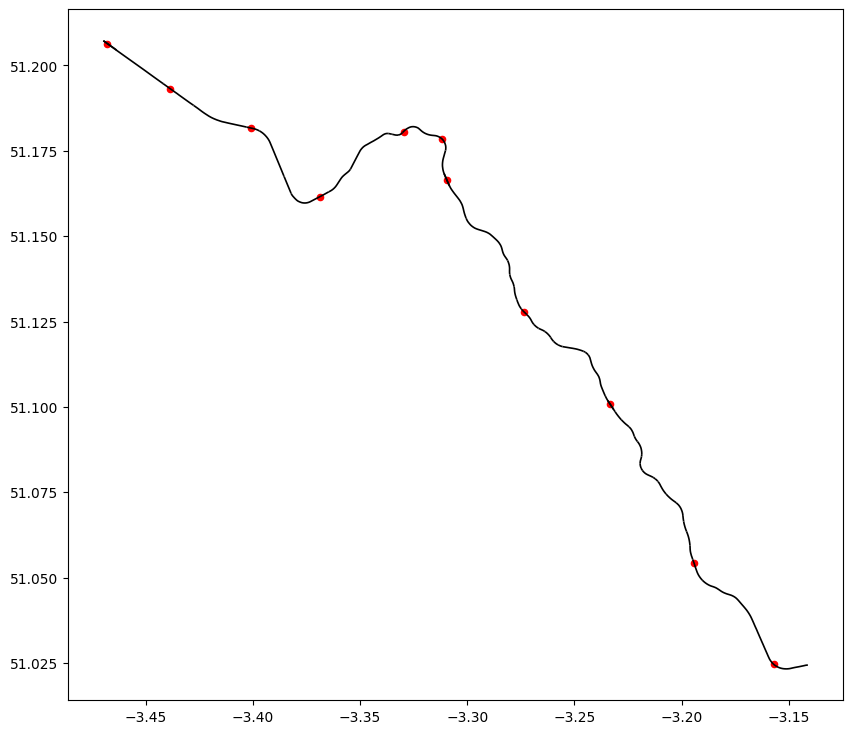

In [3]:
import geopandas as gpd

# Load Overpass export
gdf = gpd.read_file("overpass_data/export.geojson")

# 1. Select the West Somerset Railway line
wsr_line = gdf[(gdf.geometry.type == "LineString") & (gdf["name"] == "West Somerset Railway")]

# 2. Select points (stations etc.)
points = gdf[gdf.geometry.type == "Point"]

# 3. Create a buffer around the line
# buffer size is in degrees because data is usually in EPSG:4326 (lat/lon)
# 0.001 ≈ ~100m, 0.005 ≈ ~500m
buffer = wsr_line.buffer(0.001).unary_union  

# 4. Keep only points inside the buffer
points_near_wsr = points[points.geometry.within(buffer)]

# --- Plot results ---
ax = wsr_line.plot(figsize=(10, 10), color="black", linewidth=1.2)
points_near_wsr.plot(ax=ax, color="red", markersize=20)

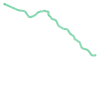

In [4]:
# make into one line
wsr_line_unary = wsr_line.union_all()
wsr_line_unary

In [5]:
# okay find how long each point is along the line


In [6]:
points_near_wsr['name']


# sort by how 

341    Crowcombe Heathfield
342               Stogumber
343           Doniford Halt
344                Williton
345                Washford
346                 Watchet
347             Blue Anchor
348                 Dunster
349                Minehead
352         Bishops Lydeard
354       Norton Fitzwarren
Name: name, dtype: object

In [7]:
# okay, calculate the distance between each point and the line
points_near_wsr['distance_to_wsr'] = points_near_wsr.geometry.apply(lambda point: point.distance(wsr_line.unary_union))
points_near_wsr['distance_to_wsr']

/var/folders/91/b5rp226n7ngfb253bz0zjxp00000gn/T/ipykernel_86040/3852477140.py:2: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  points_near_wsr['distance_to_wsr'] = points_near_wsr.geometry.apply(lambda point: point.distance(wsr_line.unary_union))
/opt/anaconda3/envs/ds_exp/lib/python3.11/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


341    0.000000
342    0.000000
343    0.000018
344    0.000000
345    0.000000
346    0.000000
347    0.000004
348    0.000000
349    0.000069
352    0.000022
354    0.000000
Name: distance_to_wsr, dtype: float64

In [9]:
# make into one line
wsr_line_unary = wsr_line.union_all()

# check if ia single string
from shapely.geometry import LineString, MultiLineString
from shapely.ops import linemerge

# if a multiline string, group into a single line
if isinstance(wsr_line_unary, MultiLineString):
    wsr_line_unary = linemerge(wsr_line_unary)
elif isinstance(wsr_line_unary, LineString):
    wsr_line_unary = wsr_line_unary

# print and show the different multiline parts
print(wsr_line_unary)

MULTILINESTRING ((-3.3108 51.1683434, -3.3109594 51.1686198, -3.3111075 51.1689218, -3.3112913 51.1693879, -3.311376 51.169682, -3.3114308 51.1699353, -3.3115298 51.1704227, -3.3115596 51.1707918, -3.3115459 51.1711765, -3.3114917 51.1716006, -3.3114017 51.1720599, -3.3112766 51.1724705, -3.3110576 51.1730097, -3.3108049 51.173563, -3.3105459 51.1741742, -3.3101337 51.175048, -3.3100928 51.1751674, -3.310023 51.1754352, -3.3100015 51.1756975, -3.3099881 51.1759615, -3.310023 51.1762794, -3.3100981 51.176577, -3.3102272 51.176856, -3.3103908 51.177157, -3.3105969 51.1774716, -3.3108383 51.1777389, -3.3111231 51.1780062, -3.3114606 51.1782635, -3.3118281 51.178504, -3.3123162 51.1787545, -3.3126332 51.1788874, -3.3130034 51.1790171, -3.3133459 51.1791244, -3.3136006 51.1791953, -3.3138994 51.1792686, -3.3141578 51.1793212, -3.3144239 51.1793691, -3.3147355 51.1794105, -3.3150519 51.1794372, -3.3156254 51.1794775, -3.3162177 51.1795086, -3.3166579 51.1795425, -3.3171335 51.1795886, -3.317

In [10]:
points_near_wsr['name']


# sort by how 

341    Crowcombe Heathfield
342               Stogumber
343           Doniford Halt
344                Williton
345                Washford
346                 Watchet
347             Blue Anchor
348                 Dunster
349                Minehead
352         Bishops Lydeard
354       Norton Fitzwarren
Name: name, dtype: object

In [14]:
import geopandas as gpd
from shapely.ops import linemerge
from shapely.geometry import LineString

# --- 1) Project to a metric CRS (UK: British National Grid in metres) ---
gdf_uk = gdf.to_crs(27700)                 # your full Overpass export, if needed
wsr_uk = wsr_line.to_crs(27700)            # the West Somerset Railway lines (LineStrings)
pts_uk = points_near_wsr.to_crs(27700)     # the points you want to measure along the line

# --- 2) Build a single LineString for the railway ---
# union all segments, then try to merge into a single continuous line
merged = linemerge(wsr_uk.geometry.union_all())


total_len_m = merged.length   # metres
total_len_km = total_len_m / 1000
print(f"Total line length: {total_len_m:.1f} m ({total_len_km:.3f} km)")

# --- 3) Project each point to distance-along-the-line (chainage) ---
def chainage_km(pt):
    s = merged.project(pt)           # metres from start
    return s / 1000.0

def chainage_norm(pt):
    s = merged.project(pt)
    return float(s / total_len_m) if total_len_m > 0 else 0.0

pts_uk = pts_uk.copy()
pts_uk["chain_km"]   = pts_uk.geometry.apply(chainage_km)     # distance from start (km)
pts_uk["chain_frac"] = pts_uk.geometry.apply(chainage_norm)   # 0..1 along the line

# (Optional) snap points to the line to get exact on-track locations
pts_uk["geom_on_line"] = pts_uk["chain_km"].apply(lambda ck: merged.interpolate(ck * 1000))

# chain_km
pts_uk[['name', 'chain_km', 'chain_frac', 'geom_on_line']]

Total line length: 38554.0 m (38.554 km)


,name,chain_km,chain_frac,geom_on_line
341,Crowcombe Heathfield,26.541544,0.688425,POINT (313739.24181045854 134221.03807208518)
342,Stogumber,21.310449,0.552743,POINT (310988.4298648642 137266.9590276966)
343,Doniford Halt,1.160409,0.030098,POINT (308415.71249406785 142941.0021904727)
344,Williton,16.841862,0.436838,POINT (308538.2503166279 141617.68022315757)
345,Washford,6.281177,0.162919,POINT (304374.96446988184 141142.02087663842)
346,Watchet,2.586822,0.067096,POINT (307153.1168602005 143218.65592771425)
347,Blue Anchor,9.992553,0.259183,POINT (302177.0576025264 143425.31743701582)
348,Dunster,12.955668,0.336039,POINT (299581.83941354137 144750.04687001478)
349,Minehead,15.479424,0.401500,POINT (297559.9926532871 146260.40141492142)
352,Bishops Lydeard,32.582845,0.845122,POINT (316400.62493912684 128988.99546432117)


In [26]:
import numpy as np
import geopandas as gpd
from shapely.geometry import LineString, Point, GeometryCollection, MultiLineString
from shapely.ops import linemerge, snap

def make_single_line(wsr_gdf: gpd.GeoDataFrame, tol_m: float = 50, connect_gaps: bool = True):
    """
    Merge railway segments into one LineString, handling small gaps/overlaps.

    Parameters
    ----------
    wsr_gdf : GeoDataFrame
        Line features for the railway (any CRS).
    tol_m : float
        Tolerance (metres) to snap endpoints and (optionally) bridge gaps.
    connect_gaps : bool
        If True, create straight connector segments between endpoints within tol_m.

    Returns
    -------
    base_line : LineString
        Longest merged line suitable for linear referencing.
    info : dict
        Diagnostics about the merge.
    """
    # 1) Project to a metric CRS (UK British National Grid)
    wsr = wsr_gdf.to_crs(27700)

    # 2) Collapse all segments into one (Multi)LineString
    geom = wsr.unary_union  # GeoDataFrame -> (Multi)LineString

    # 3) Snap endpoints within tolerance to close tiny gaps/overlaps
    snapped = snap(geom, geom, tol_m)

    # 4) Merge connected segments
    merged = linemerge(snapped)

    # 5) Optionally bridge remaining close endpoints with straight lines
    connectors = []
    if connect_gaps:
        if merged.geom_type == "LineString":
            parts = [merged]
        elif merged.geom_type == "MultiLineString":
            parts = list(merged.geoms)
        else:
            parts = list(linemerge(merged).geoms)

        # Collect endpoints (start & end) of each part
        endpoints = []
        for i, ls in enumerate(parts):
            coords = list(ls.coords)
            endpoints.append((i, Point(coords[0])))
            endpoints.append((i, Point(coords[-1])))

        if endpoints:
            # Try KDTree for O(n log n); fall back to O(n^2) if SciPy missing
            try:
                from scipy.spatial import cKDTree
                pts = np.array([[p.x, p.y] for _, p in endpoints])
                tree = cKDTree(pts)
                pairs = set()
                for idx in range(len(endpoints)):
                    # Query neighbors within tol_m (including self)
                    nbr_idx = tree.query_ball_point(pts[idx], tol_m)
                    for j in nbr_idx:
                        if j == idx:
                            continue
                        a, b = sorted((idx, j))
                        # Only pair endpoints from different segments
                        if endpoints[a][0] != endpoints[b][0]:
                            pairs.add((a, b))
            except Exception:
                # Fallback: brute-force compare
                pairs = set()
                for a in range(len(endpoints)):
                    for b in range(a + 1, len(endpoints)):
                        (seg_a, pa), (seg_b, pb) = endpoints[a], endpoints[b]
                        if seg_a != seg_b and pa.distance(pb) <= tol_m:
                            pairs.add((a, b))

            # Build connector lines
            for a, b in pairs:
                pa = endpoints[a][1]
                pb = endpoints[b][1]
                if pa.distance(pb) <= tol_m:
                    connectors.append(LineString([pa, pb]))

    # 6) Union original merged with connectors and merge again
    if connectors:
        combo = GeometryCollection([merged, MultiLineString(connectors)])
    else:
        combo = merged
    merged2 = linemerge(snap(combo, combo, tol_m))

    # 7) If still Multi, choose the longest as the base chain
    if merged2.geom_type == "MultiLineString":
        base_line = max(list(merged2.geoms), key=lambda L: L.length)
        still_multi = True
    else:
        base_line = merged2
        still_multi = False

    info = {
        "n_input_segments": int(len(wsr)),
        "n_connectors": int(len(connectors)),
        "total_len_m": float(base_line.length),
        "still_multi": bool(still_multi),
    }
    return base_line, info

In [27]:
# wsr_line: your West Somerset Railway segments (LineStrings)
base_line, info = make_single_line(wsr_line, tol_m=2000, connect_gaps=True)
print(info)

# Now you can linear-reference in metres/kilometres:
total_len_km = base_line.length / 1000
points_uk = points_near_wsr.to_crs(27700).copy()
points_uk["chain_km"] = points_uk.geometry.apply(lambda p: base_line.project(p) / 1000)

/var/folders/91/b5rp226n7ngfb253bz0zjxp00000gn/T/ipykernel_86040/1920177414.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom = wsr.unary_union  # GeoDataFrame -> (Multi)LineString


NotImplementedError: Sub-geometries may have coordinate sequences, but multi-part geometries do not